# Homework 1

## Demetrios Lambropoulos

## Zip Code Analysis



### Initialization

In [0]:
# Obtain the ZIP Code Training Data Set
!wget https://web.stanford.edu/~hastie/ElemStatLearn/datasets/zip.train.gz

--2020-02-07 00:04:21--  https://web.stanford.edu/~hastie/ElemStatLearn/datasets/zip.train.gz
Resolving web.stanford.edu (web.stanford.edu)... 171.67.215.200
Connecting to web.stanford.edu (web.stanford.edu)|171.67.215.200|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1829071 (1.7M) [application/x-gzip]
Saving to: ‘zip.train.gz’

zip.train.gz        100%[===================>]   1.74M   412KB/s    in 5.2s    

2020-02-07 00:04:27 (346 KB/s) - ‘zip.train.gz’ saved [1829071/1829071]



In [0]:
# Obtain the ZIP Code Testing Data Set
!wget https://web.stanford.edu/~hastie/ElemStatLearn/datasets/zip.test.gz

--2020-02-07 00:04:31--  https://web.stanford.edu/~hastie/ElemStatLearn/datasets/zip.test.gz
Resolving web.stanford.edu (web.stanford.edu)... 171.67.215.200
Connecting to web.stanford.edu (web.stanford.edu)|171.67.215.200|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 439208 (429K) [application/x-gzip]
Saving to: ‘zip.test.gz’

zip.test.gz         100%[===================>] 428.91K   617KB/s    in 0.7s    

2020-02-07 00:04:32 (617 KB/s) - ‘zip.test.gz’ saved [439208/439208]



In [0]:
# Extract both folders
!gunzip zip.train.gz
!gunzip zip.test.gz

In [0]:
# Library required for numerical matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression

# Load the test dataset
test = np.loadtxt('zip.test')

# Load the train dataset
train = np.loadtxt('zip.train')

# Dummy iterator
count = 0

# Clean test dataset to only contain labels 2 and 3
for i in test:
  if i[0] != 2 and i[0] != 3:
    test = np.delete(test, count, 0)
  else:
    count = count + 1

# Confirm integrity of test dataset
count_two = 0
count_three = 0
for i in test:
  if i[0] == 2:
    count_two = count_two + 1
  if i[0] == 3:
    count_three = count_three + 1

# Display that all rows with either label has not been altered
print ("Number of rows in test set with label 2 : ", 
       count_two, " Original: 198" )
print ("Number of rows in test set with label 3 : ", 
       count_three, " Original: 166")

# Clean train dataset to only contain labels 2 and 3
count = 0
for i in train:
  if i[0] != 2 and i[0] != 3:
    train = np.delete(train, count, 0)
  else:
    count = count + 1  

# Confirm integrity of train dataset
count_two = 0
count_three = 0
for i in train:
  if i[0] == 2:
    count_two = count_two + 1
  if i[0] == 3:
    count_three = count_three + 1

# Display that all rows with either label has not been altered
print ("Number of rows in train set with label 2 : ", 
       count_two, " Original: 731" )
print ("Number of rows in train set with label 3 : ", 
       count_three, " Original: 658")    

Number of rows in test set with label 2 :  198  Original: 198
Number of rows in test set with label 3 :  166  Original: 166
Number of rows in train set with label 2 :  731  Original: 731
Number of rows in train set with label 3 :  658  Original: 658


In [0]:
# Separate the training data to X and y
y_train = train[:,0]
x_train = train[:, 1:]

# Separate the test data to X and y
y_test = test[:,0]
x_test = test[:, 1:]

### Linear Regression

Predicted classifications can be given by 

$$\hat{Y} = X^T\hat{\beta}$$

Given that the X matrix in this example is invertible we can calculate the $\hat{\beta}$ with the following

$$\hat{\beta} = (X^T X)^{-1}X^Ty$$

The Residual Sum of Squares can be given by

$$RSS(\beta) = \sum_{i=1}^N (y_i-x_i^T\beta)^2$$
$$   = (y - X\beta)^T \cdot (y - X\beta)$$

In [0]:
from sklearn.metrics import accuracy_score

# Matrix is invertible 
# Obtain the beta regression values with the formula 
# (X^T * X)^-1 * X^T * y = beta
beta = np.matmul(np.matmul(np.linalg.inv(np.matmul(x_train.transpose(), 
                                x_train)),x_train.transpose()), y_train)

#print(beta.shape)
#(x_train.shape)

# Calculate the Residual Sum of Squares (RSS) = 
# (y - (X * beta) ^T) * (y - (X * beta))
rss = np.matmul((y_train - np.matmul(x_train,beta)).transpose(), 
                (y_train - np.matmul(x_train, beta)))

# Display the RSS value
print("The Resisdual Sum of Squares (RSS) of the training set is ", rss)

# Import the linear regression model from sklearn
from sklearn.linear_model import LinearRegression

# Initialize a new model
linear_regression_model = LinearRegression()

# Fit the model to the training data Xtrain and Ytrain
linear_regression_model.fit(x_train, y_train)

# Get the predicted classifications from the Linear Regression Model
ypred = linear_regression_model.predict(x_train)

# Calculate the Linear Regression error based on the training data
train_linear_error = 1 - accuracy_score(y_train, ypred.round())

# Display the result
print ("Train error - Linear ", train_linear_error)

# Calculate the Linear Regression error based on the test data
test_linear_error = 1 - accuracy_score(y_test, 
                                       linear_regression_model.predict(x_test)
                                       .round())

# Display the result
print ("Test error - Linear ", test_linear_error)

The Resisdual Sum of Squares (RSS) of the training set is  34.465042258668305
Train error - Linear  0.005759539236861011
Test error - Linear  0.04120879120879117


Text(0, 0.5, 'Error Rate')

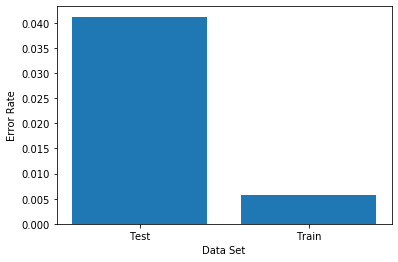

In [0]:
# Plot the training and test set error in a Bar Chart
plt.bar(["Test", "Train"], [test_linear_error, train_linear_error])

# Set the X label
plt.xlabel("Data Set")

# Set the Y label
plt.ylabel("Error Rate")

### K-Nearest Neighbors

$$\hat{Y} = \frac{1}{k} \sum_{x_i \in N_k(X)} y_i$$

Where $N_k(X)$ is the neighborhood of $X$ defined by $k$ closest points in training set 

In [0]:
# Import the library for k-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

# Classifier for 1 neighbor
neighbors1_classifier = KNeighborsClassifier(n_neighbors=1)

# Classifier for 3 neighbors
neighbors3_classifier = KNeighborsClassifier(n_neighbors=3)

# Classifier for 5 neighbors
neighbors5_classifier = KNeighborsClassifier(n_neighbors=5)

# Classifier for 7 neighbors
neighbors7_classifier = KNeighborsClassifier(n_neighbors=7)

# Classifier for 15 neighbors
neighbors15_classifier = KNeighborsClassifier(n_neighbors=15)

# Fit the training data to the classifiers 
neighbors1_classifier.fit(x_train, y_train)
neighbors3_classifier.fit(x_train, y_train)
neighbors5_classifier.fit(x_train, y_train)
neighbors7_classifier.fit(x_train, y_train)
neighbors15_classifier.fit(x_train, y_train)

# Obtain the y predicted 
y_1_predicted = neighbors1_classifier.predict(x_train)
y_3_predicted = neighbors3_classifier.predict(x_train)
y_5_predicted = neighbors5_classifier.predict(x_train)
y_7_predicted = neighbors7_classifier.predict(x_train)
y_15_predicted = neighbors15_classifier.predict(x_train)

# Calculate the error rates for the training set
train_error_rate_1 = 1 - accuracy_score(y_train, 
                                        neighbors1_classifier.predict(x_train))
train_error_rate_3 = 1 - accuracy_score(y_train, 
                                        neighbors3_classifier.predict(x_train))
train_error_rate_5 = 1 - accuracy_score(y_train, 
                                        neighbors5_classifier.predict(x_train))
train_error_rate_7 = 1 - accuracy_score(y_train, 
                                        neighbors7_classifier.predict(x_train))
train_error_rate_15 = 1 - accuracy_score(y_train, 
                                         neighbors15_classifier.predict(x_train))

# Display the error rates for the training set
print("The predicted error rate for k-nearest neighbors (n=1)",
       "on the training set is", train_error_rate_1)
print("The predicted error rate for k-nearest neighbors (n=3)",
 "on the training set is", train_error_rate_3)
print("The predicted error rate for k-nearest neighbors (n=5)",
      "on the training set is", train_error_rate_5)
print("The predicted error rate for k-nearest neighbors (n=7)",
      "on the training set is", train_error_rate_7)
print("The predicted error rate for k-nearest neighbors (n=15)",
      "on the training set is", train_error_rate_15)

The predicted error rate for k-nearest neighbors (n=1) on the training set is 0.0
The predicted error rate for k-nearest neighbors (n=3) on the training set is 0.005039596832253412
The predicted error rate for k-nearest neighbors (n=5) on the training set is 0.005759539236861011
The predicted error rate for k-nearest neighbors (n=7) on the training set is 0.006479481641468721
The predicted error rate for k-nearest neighbors (n=15) on the training set is 0.009359251259899226


In [0]:
# Calculate the error rates for the test set
test_error_rate_1 = 1 - accuracy_score(y_test, 
                                       neighbors1_classifier.predict(x_test))
test_error_rate_3 = 1 - accuracy_score(y_test, 
                                       neighbors3_classifier.predict(x_test))
test_error_rate_5 = 1 - accuracy_score(y_test, 
                                       neighbors5_classifier.predict(x_test))
test_error_rate_7 = 1 - accuracy_score(y_test, 
                                       neighbors7_classifier.predict(x_test))
test_error_rate_15 = 1 - accuracy_score(y_test, 
                                        neighbors15_classifier.predict(x_test))

# Display the error rates for the test set
print("The predicted error rate for k-nearest neighbors (n=1)",
      "on the test set is", test_error_rate_1)
print("The predicted error rate for k-nearest neighbors (n=3)",
      "on the test set is", test_error_rate_3)
print("The predicted error rate for k-nearest neighbors (n=5)",
      "on the test set is", test_error_rate_5)
print("The predicted error rate for k-nearest neighbors (n=7)",
      "on the test set is", test_error_rate_7)
print("The predicted error rate for k-nearest neighbors (n=15)",
      "on the test set is", test_error_rate_15)

The predicted error rate for k-nearest neighbors (n=1) on the test set is 0.02472527472527475
The predicted error rate for k-nearest neighbors (n=3) on the test set is 0.030219780219780223
The predicted error rate for k-nearest neighbors (n=5) on the test set is 0.030219780219780223
The predicted error rate for k-nearest neighbors (n=7) on the test set is 0.03296703296703296
The predicted error rate for k-nearest neighbors (n=15) on the test set is 0.038461538461538436


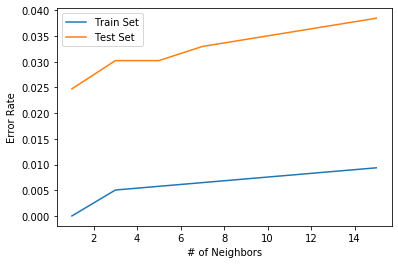

In [0]:
# Create an array for the x-axis
x_label = np.array([1,3,5,7,15])

# Create an array for the y-axis for the training and test 
y_train_label = np.array([train_error_rate_1, train_error_rate_3, 
                          train_error_rate_5, train_error_rate_7, 
                          train_error_rate_15])
y_test_label = np.array([test_error_rate_1, test_error_rate_3, 
                         test_error_rate_5, test_error_rate_7, 
                         test_error_rate_15])

# Plot the error rates in comparison to the number of neighbors
plt.plot(x_label, y_train_label, x_label, y_test_label)

# Set the X label
plt.xlabel("# of Neighbors")

# Set the Y label
plt.ylabel("Error Rate")

# Add a legend to the plot
plt.legend(["Train Set", "Test Set"])